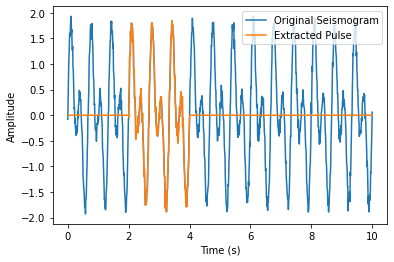

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic seismogram
time = np.linspace(0, 10, num=1000)
seismogram = np.sin(2 * np.pi * 1.5 * time) + np.sin(2 * np.pi * 3 * time)

# Add some noise to the seismogram
seismogram = seismogram + 0.1 * np.random.randn(len(seismogram))

# Plot the original seismogram
plt.plot(time, seismogram, label='Original Seismogram')

# Extract the first pulse
pulse = seismogram * (time >= 2) * (time <= 4)

# Plot the extracted pulse
plt.plot(time, pulse, label='Extracted Pulse')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


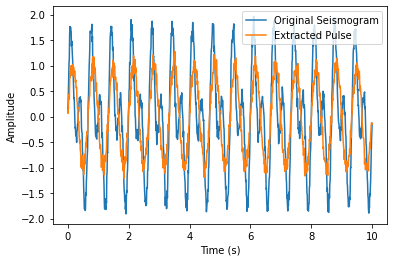

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Generate a synthetic seismogram
time = np.linspace(0, 10, num=1000)
seismogram = np.sin(2 * np.pi * 1.5 * time) + np.sin(2 * np.pi * 3 * time)

# Add some noise to the seismogram
seismogram = seismogram + 0.1 * np.random.randn(len(seismogram))

# Plot the original seismogram
plt.plot(time, seismogram, label='Original Seismogram')

# Compute the analytic signal using the Hilbert transform
analytic_signal = hilbert(seismogram)

# Extract the first pulse using empirical Fourier decomposition
frequency = 2 * np.pi * 1.5
pulse = np.real(analytic_signal * np.exp(-1j * frequency * time))

# Plot the extracted pulse
plt.plot(time, pulse, label='Extracted Pulse')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


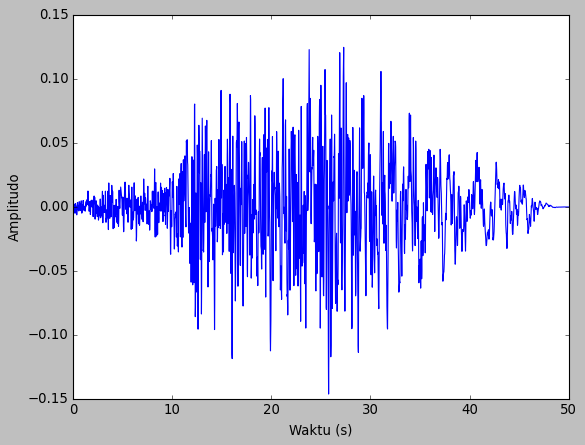

In [27]:
import matplotlib.pyplot as plt

# Load data seismogram
with open("data_seismogram.txt", "r") as f:
    data = f.readlines()

# Konversi data ke array
time = [float(row.split()[0]) for row in data]
amplitude = [float(row.split()[1]) for row in data]

# Plot data seismogram
plt.plot(time, amplitude)
plt.style.use("classic")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.show()

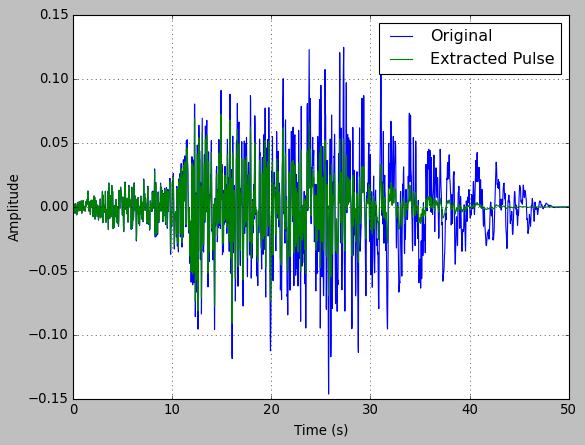

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Load the seismogram data
seismogram = np.loadtxt('data_seismogram.txt', delimiter='\t')
time = seismogram[:, 0]
amplitude = seismogram[:, 1]

# Define the Baker window
def baker_window(t, t0, tau):
    return 0.5 * (1 + np.cos(np.pi * (t - t0) / tau))

# Extract the first pulse using Baker method
t0 = time[0]
tau = time[-1] - time[0]
window = baker_window(time, t0, tau)
pulse = amplitude * window

# Plot the extracted pulse
plt.style.use("classic")
plt.plot(time, amplitude, label='Original')
plt.plot(time, pulse, label='Extracted Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid(True)
plt.legend()
plt.show()